In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# VERI TIPI I

A = pd.DataFrame([30, 27, 21, 27, 29, 30, 20, 20, 27, 32,
                  35, 22, 24, 23, 25, 27, 23, 27, 23, 25,
                  21, 18, 24, 26, 33, 26, 27, 28, 19, 25])

B = pd.DataFrame([37, 39, 31, 31, 34, 38, 30, 36, 29, 28,
                  38, 28, 37, 37, 30, 32, 31, 31, 27, 32,
                  33, 33, 33, 31, 32, 33, 26, 32, 33, 29])

A_B = pd.concat([A, B], axis=1)
A_B.columns = ["A", "B"]
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [3]:
A = pd.DataFrame([30, 27, 21, 27, 29, 30, 20, 20, 27, 32,
                  35, 22, 24, 23, 25, 27, 23, 27, 23, 25,
                  21, 18, 24, 26, 33, 26, 27, 28, 19, 25])

B = pd.DataFrame([37, 39, 31, 31, 34, 38, 30, 36, 29, 28,
                  38, 28, 37, 37, 30, 32, 31, 31, 27, 32,
                  33, 33, 33, 31, 32, 33, 26, 32, 33, 29])

# A ve A nın grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis=1)

# B ve B nın grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis=1)

# Tüm veri
AB = pd.concat([A, B])
AB.columns = ["gelir", "Grup"]
print(AB.head())
print(AB.tail())

   gelir Grup
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir Grup
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


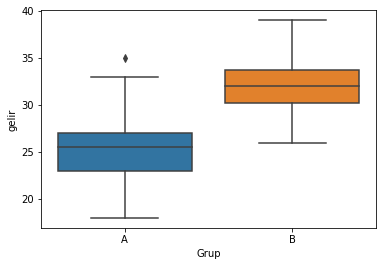

In [4]:
sns.boxplot(x="Grup", y="gelir", data=AB)

#### VARSAYIM KONTROLU

In [5]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [6]:
AB.head()

,gelir,Grup
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [7]:
# normallik varsayımı
from scipy.stats import shapiro

print(shapiro(A_B.A))
# H0 reddedilemiyor

print(shapiro(A_B.B))
# H0 reddedilemiyor

(0.9789242148399353, 0.7962799668312073)
(0.9561261534690857, 0.2458445429801941)


In [8]:
# varyans homojenligi varsayimi
from scipy import stats
""" 
    H0: varyanslar homojendir
    H1: varyanslar homojen degildir.
"""

print(stats.levene(A_B.A, A_B.B))
# H0 reddedilemiyor

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)


### Hipotez testi

In [9]:
stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)
# H0 reddedilebilir

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [10]:
test_istatistigi, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)
print("test istatistigi: %.4f, p-value: %.4f" %(test_istatistigi, pvalue))

test istatistigi: -7.0287, p-value: 0.0000


### Nonparametrik bagimsiz iki orneklem T testi

In [12]:
test_istatistigi, pvalue = stats.mannwhitneyu(A_B["A"], A_B["B"])
print("test istatistigi: %.4f, p-value: %.4f" % (test_istatistigi, pvalue))

test istatistigi: 89.5000, p-value: 0.0000
